In [1]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
#import is3_broker_rl
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
#DATA_DIR = Path(is3_broker_rl.__file__).parent.parent / "data"

In [3]:
# Papermill parameter cell
# Name of the directory to analyse. Should contain consumption_action.csv and consumption_reward.csv.
ANALYSIS_DIR_NAME = "/data/active/powertac/es22/is3-data"
COMMENTS = ""


In [4]:
print(COMMENTS)

In [5]:
#path = "../data/"
reward_prefix = "wholesale_reward.csv"

In [6]:
ANALYSIS_DIR = ANALYSIS_DIR_NAME

### Reward analysis

In [7]:
df_reward = pd.read_csv(os.path.join(ANALYSIS_DIR,reward_prefix))


In [8]:
# Fixes the issue that the experiment scheduler always assigns the same gameId
def write_unique_game_id(df):
    new_game_start_indices = df[df["timeslot"] < df["timeslot"].shift()].index
    if len(new_game_start_indices) > 0:
        df.loc[: new_game_start_indices[0], "gameId"] = f"game0"
        for i in range(len(new_game_start_indices) - 1):
            df.loc[new_game_start_indices[i] : new_game_start_indices[i + 1], "gameId"] = f"game{i + 1}"
        df.loc[new_game_start_indices[-1] :, "gameId"] = f"game{len(new_game_start_indices)}"

In [9]:
def min_max_scaler(series):
    return (series - series.min()) / (series.max() - series.min())

In [10]:

df_reward.dropna(inplace=True) # Drop first few timesteps that have no action. 
df_reward2 = df_reward["observation"].apply(json.loads)
col_names = list(df_reward2.iloc[0].keys())
df_reward2 = df_reward2.apply(lambda x: list(x.values()))
temp_list = []
for row in df_reward2:

    temp_list.append(row)

temp_df = pd.DataFrame(temp_list, columns=col_names)

temp_merge_df = pd.DataFrame()
temp_name = []
for column in temp_df.columns:
    if type(temp_df[column].iloc[0]) == list:
        temp_df2 = temp_df[column].apply(pd.Series)
        i=0
        for column2 in temp_df2:
            temp_merge_df[f"{column}_{i}"] = temp_df2[column2]
            i+=1
            
        
    else:
        temp_merge_df[column] = temp_df[column]
    
col_names = []
price = []
energy = []
for i in range(24):
    col_names.append(f"energy_{i+1}")
    col_names.append(f"price_{i+1}")
    price.append(f"price_{i+1}")
    energy.append(f"energy_{i+1}")




/home/lkriehn/venv/lib/python3.7/site-packages/ipykernel_launcher.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/home/lkriehn/venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [11]:
df_action = df_reward.apply(lambda x: x["last_action"].split(";"), result_type="expand", axis=1).drop(0, axis=1)
df_action = df_action.astype(float)
df_action.columns = col_names
action_observation_reward_df = pd.concat([df_action,temp_merge_df, df_reward[["reward", "balancing_reward", "wholesale_reward","shaped_return","sum_mWh", "tariff_reward"]]],axis=1)
write_unique_game_id(action_observation_reward_df)
df = action_observation_reward_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4443 entries, 0 to 4442
Columns: 394 entries, energy_1 to tariff_reward
dtypes: float64(391), int64(2), object(1)
memory usage: 13.5+ MB


In [12]:
#df = df.iloc[2200:2500]

In [13]:
df[df["customer_count"].shift(1) -df["customer_count"] > 8000 | (df["customer_count"].shift(1) -df["customer_count"] < 8000)]["customer_count"]

5        7297
20       7277
26       7247
38      12356
62      13721
        ...  
4372     8865
4378     8857
4384     8704
4396     7560
4420     8757
Name: customer_count, Length: 187, dtype: int64

In [14]:
df.iloc[5300:8000][["customer_count","reward","balancing_reward", "wholesale_reward","shaped_return","customer_count"]].tail(5)

,customer_count,reward,balancing_reward,wholesale_reward,shaped_return,customer_count


In [15]:
df

,energy_1,price_1,energy_2,price_2,energy_3,price_3,energy_4,price_4,energy_5,price_5,...,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,reward,balancing_reward,wholesale_reward,shaped_return,sum_mWh,tariff_reward
0,-2.548109,-1.587300,-0.587095,8.189049,2.834374,-12.037125,-2.685600,35.636773,-4.558937,62.878911,...,0.0,0.0,0.0,0.0,-4.338684,0.005755,0.000000,-0.057733,-5.773340,-0.001985
1,1.985496,-10.845254,-2.424384,43.643580,0.736185,-25.954372,3.561752,-0.615253,0.205601,-31.010794,...,0.0,0.0,0.0,0.0,-0.108154,-0.002712,0.000058,-0.024148,-0.133273,0.002613
2,-1.545135,68.266161,-5.353340,58.595010,-0.619689,44.816122,0.985060,-15.601795,3.166211,-5.743234,...,0.0,0.0,0.0,0.0,-4.743604,-0.007747,-0.000085,-0.061720,7.570374,0.011649
3,-0.628589,61.220704,3.753501,-2.353741,-0.280518,65.247255,1.221571,-22.684335,1.858101,-22.449974,...,0.0,0.0,0.0,0.0,-4.763492,0.001447,-0.000019,-0.008214,0.992923,0.002952
4,1.249792,-45.629165,-0.028008,73.544905,-1.522247,81.666696,4.062838,-6.104846,-0.470954,42.331468,...,0.0,0.0,0.0,0.0,-2.861684,0.000689,-0.000012,-0.007971,1.533296,0.004663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,-10.242367,176.205750,10.593494,-0.000000,10.396745,-0.000000,11.283672,-0.343555,11.099309,-0.488300,...,0.0,0.0,0.0,0.0,-10.242367,-0.013951,0.000000,-0.068894,6.889371,0.021707
4439,-8.508394,179.478725,6.922480,-0.004305,8.215259,-0.000000,7.414598,-0.181019,5.392813,-0.340047,...,0.0,0.0,0.0,0.0,-8.508394,-0.009470,0.000000,-0.055929,5.592931,0.021420
4440,-8.796748,173.872642,7.232724,-0.000000,7.950840,-0.000000,6.894386,-0.081179,4.858530,-0.236915,...,0.0,0.0,0.0,0.0,-8.796748,0.002164,0.000000,-0.064199,-6.419949,0.013377
4441,-9.873926,159.511171,10.043603,-0.000000,8.020765,-0.000000,6.345226,-0.000000,3.518204,-0.433300,...,0.0,0.0,0.0,0.0,-9.873926,-0.000006,0.000000,-0.147295,-14.729479,0.007138


In [16]:
df_reward_rolling = df["reward"].rolling(80).mean().dropna()
df_balancing_reward = df["balancing_reward"].rolling(1).mean().dropna()
df_wholesale_reward = df["wholesale_reward"].rolling(1).mean().dropna()
df_tariff_reward = df["tariff_reward"].rolling(1).mean().dropna()
#df_shaped = df_reward["shaped_return"].rolling(20).mean().dropna()

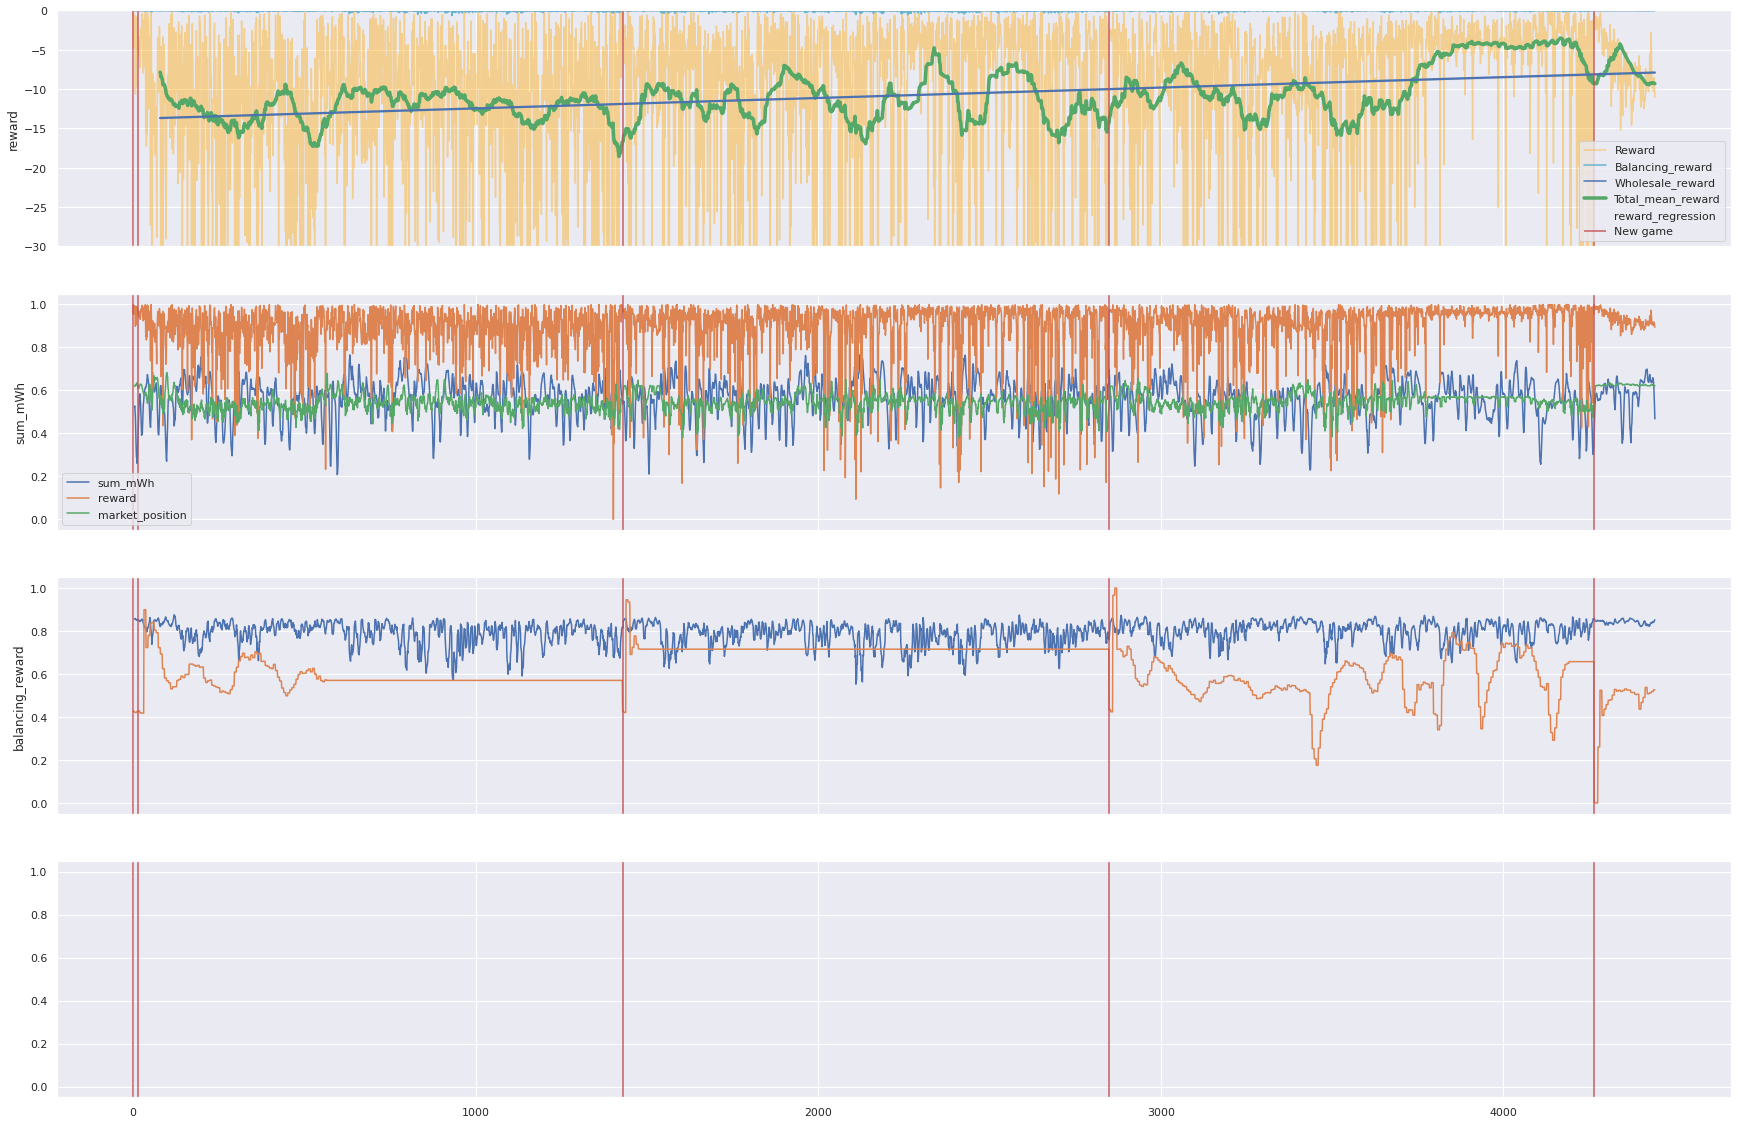

In [17]:

from cProfile import label


sns.set_theme()
sns.axes_style("darkgrid")
f, axs = plt.subplots(4, 1, sharex=True)



#graph5 = sns.lineplot(x=df_tariff_reward.index, y=df_tariff_reward, ax=axs, label="Tariff_reward")
#graph6 = sns.lineplot(x=df_shaped.index, y=df_shaped, ax=axs, label="Shaped_reward", color="green")

# plot 1: reward over time
graph7 = sns.lineplot(x=df.index, y=df["reward"], color="orange", ax=axs[0], alpha=0.4, label="Reward")

graph3 = sns.lineplot(x=df_balancing_reward.index, y=df_balancing_reward, ax=axs[0], label="Balancing_reward", color="c")
graph4 = sns.lineplot(x=df_wholesale_reward.index, y=df_wholesale_reward, ax=axs[0],label="Wholesale_reward", color="b")
graph2 = sns.lineplot(x=df_reward_rolling.index, y=df_reward_rolling, ax=axs[0], label="Total_mean_reward", linewidth= 3.5, color="g")
graph8 = sns.regplot(x=df_reward_rolling.index, y=df_reward_rolling, marker="", label="reward_regression", ax=axs[0])
# plot 2: reward over time with prosumption
graph9 = sns.lineplot(x=df.index, y=min_max_scaler(df["sum_mWh"]).rolling(5).mean(), data=df, ax=axs[1], label="sum_mWh")
graph9 = sns.lineplot(x=df.index, y=min_max_scaler(df["reward"]).rolling(1).mean(), data=df, ax=axs[1], label="reward")
sns.lineplot(x=df.index, y=min_max_scaler(df["market_position_0"]).rolling(5).mean(), data=df, ax=axs[1], label="market_position")
# plot 3: balancing reward with customer.
sns.lineplot(x=df.index, y=min_max_scaler(df["balancing_reward"]).rolling(5).mean(), data=df, ax=axs[2])
sns.lineplot(x=df.index, y=min_max_scaler(df["customer_count"]), data=df, ax=axs[2])


    

for ax in axs:
    ax.vlines(
            df[df["gameId"].shift() != df["gameId"]].index,
            0,
            1,
            transform=ax.get_xaxis_transform(),
            colors="r",
            alpha=0.9,
            label="New game",
        )
axs[0].legend()
axs[1].set_ylabel("sum_mWh")
axs[0].set_ybound(-30,0.05)
f.set_figwidth(30)
f.set_figheight(20)


<AxesSubplot:ylabel='reward'>

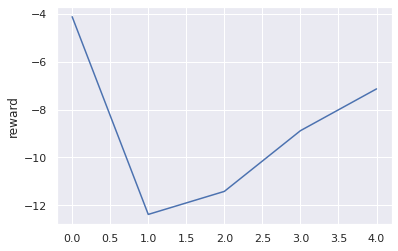

In [18]:
# mean reward per game:
df_game = df.groupby("gameId").mean()
sns.lineplot(x=range(len(df_game)), y= df_game["reward"])

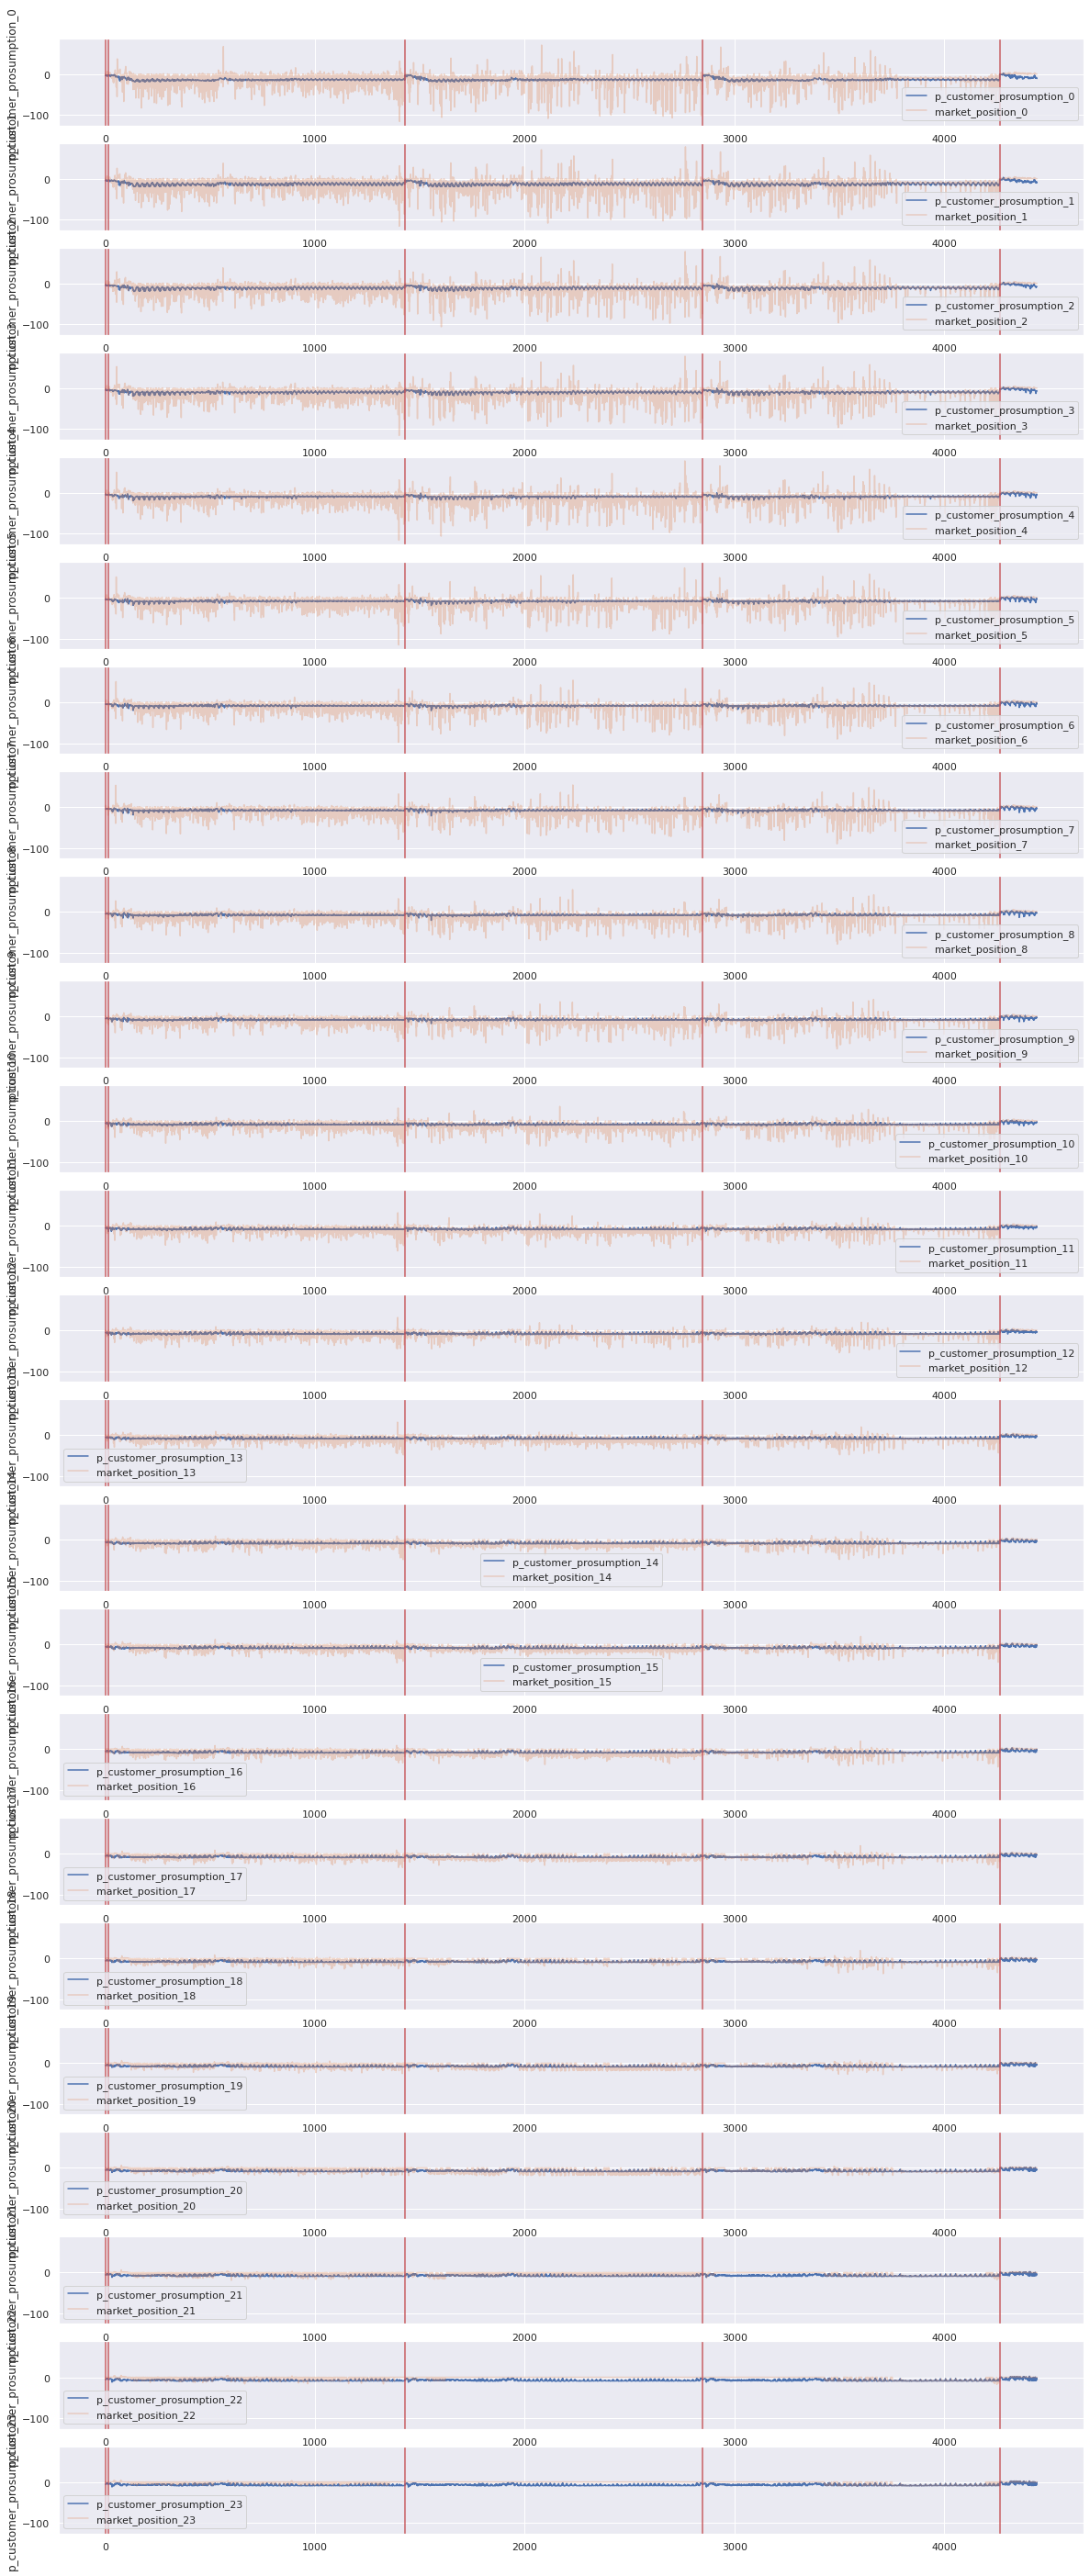

In [19]:
fig, axs = plt.subplots(24,1, sharey=True)
i=0
j=0
for col in df.columns:
    if "market" in col:
        sns.lineplot(x=df[col].index ,y=(df[col].rolling(1).mean()), data=df[col] , ax=axs[i], label=col, alpha=0.3)
        #sns.lineplot(x=df.index, y=min_max_scaler(df["reward"]).rolling(5).mean(), data=df, ax=axs[i], label="reward")
        i+=1
        
       
        #axs[i].legend()
    if "p_cus" in col:
        sns.lineplot(x=df[col].index ,y=(df[col].rolling(1).mean()/1000), data=df[col] , ax=axs[j], label=col)
        j+=1
        
axs[0].set_ybound(-30,5)
fig.set_figwidth(20)
fig.set_figheight(50)
for ax in axs:
    ax.vlines(
            df[df["gameId"].shift() != df["gameId"]].index,
            -30,
            5,
            transform=ax.get_xaxis_transform(),
            colors="r",
            alpha=0.9,
            label="New game",
        )


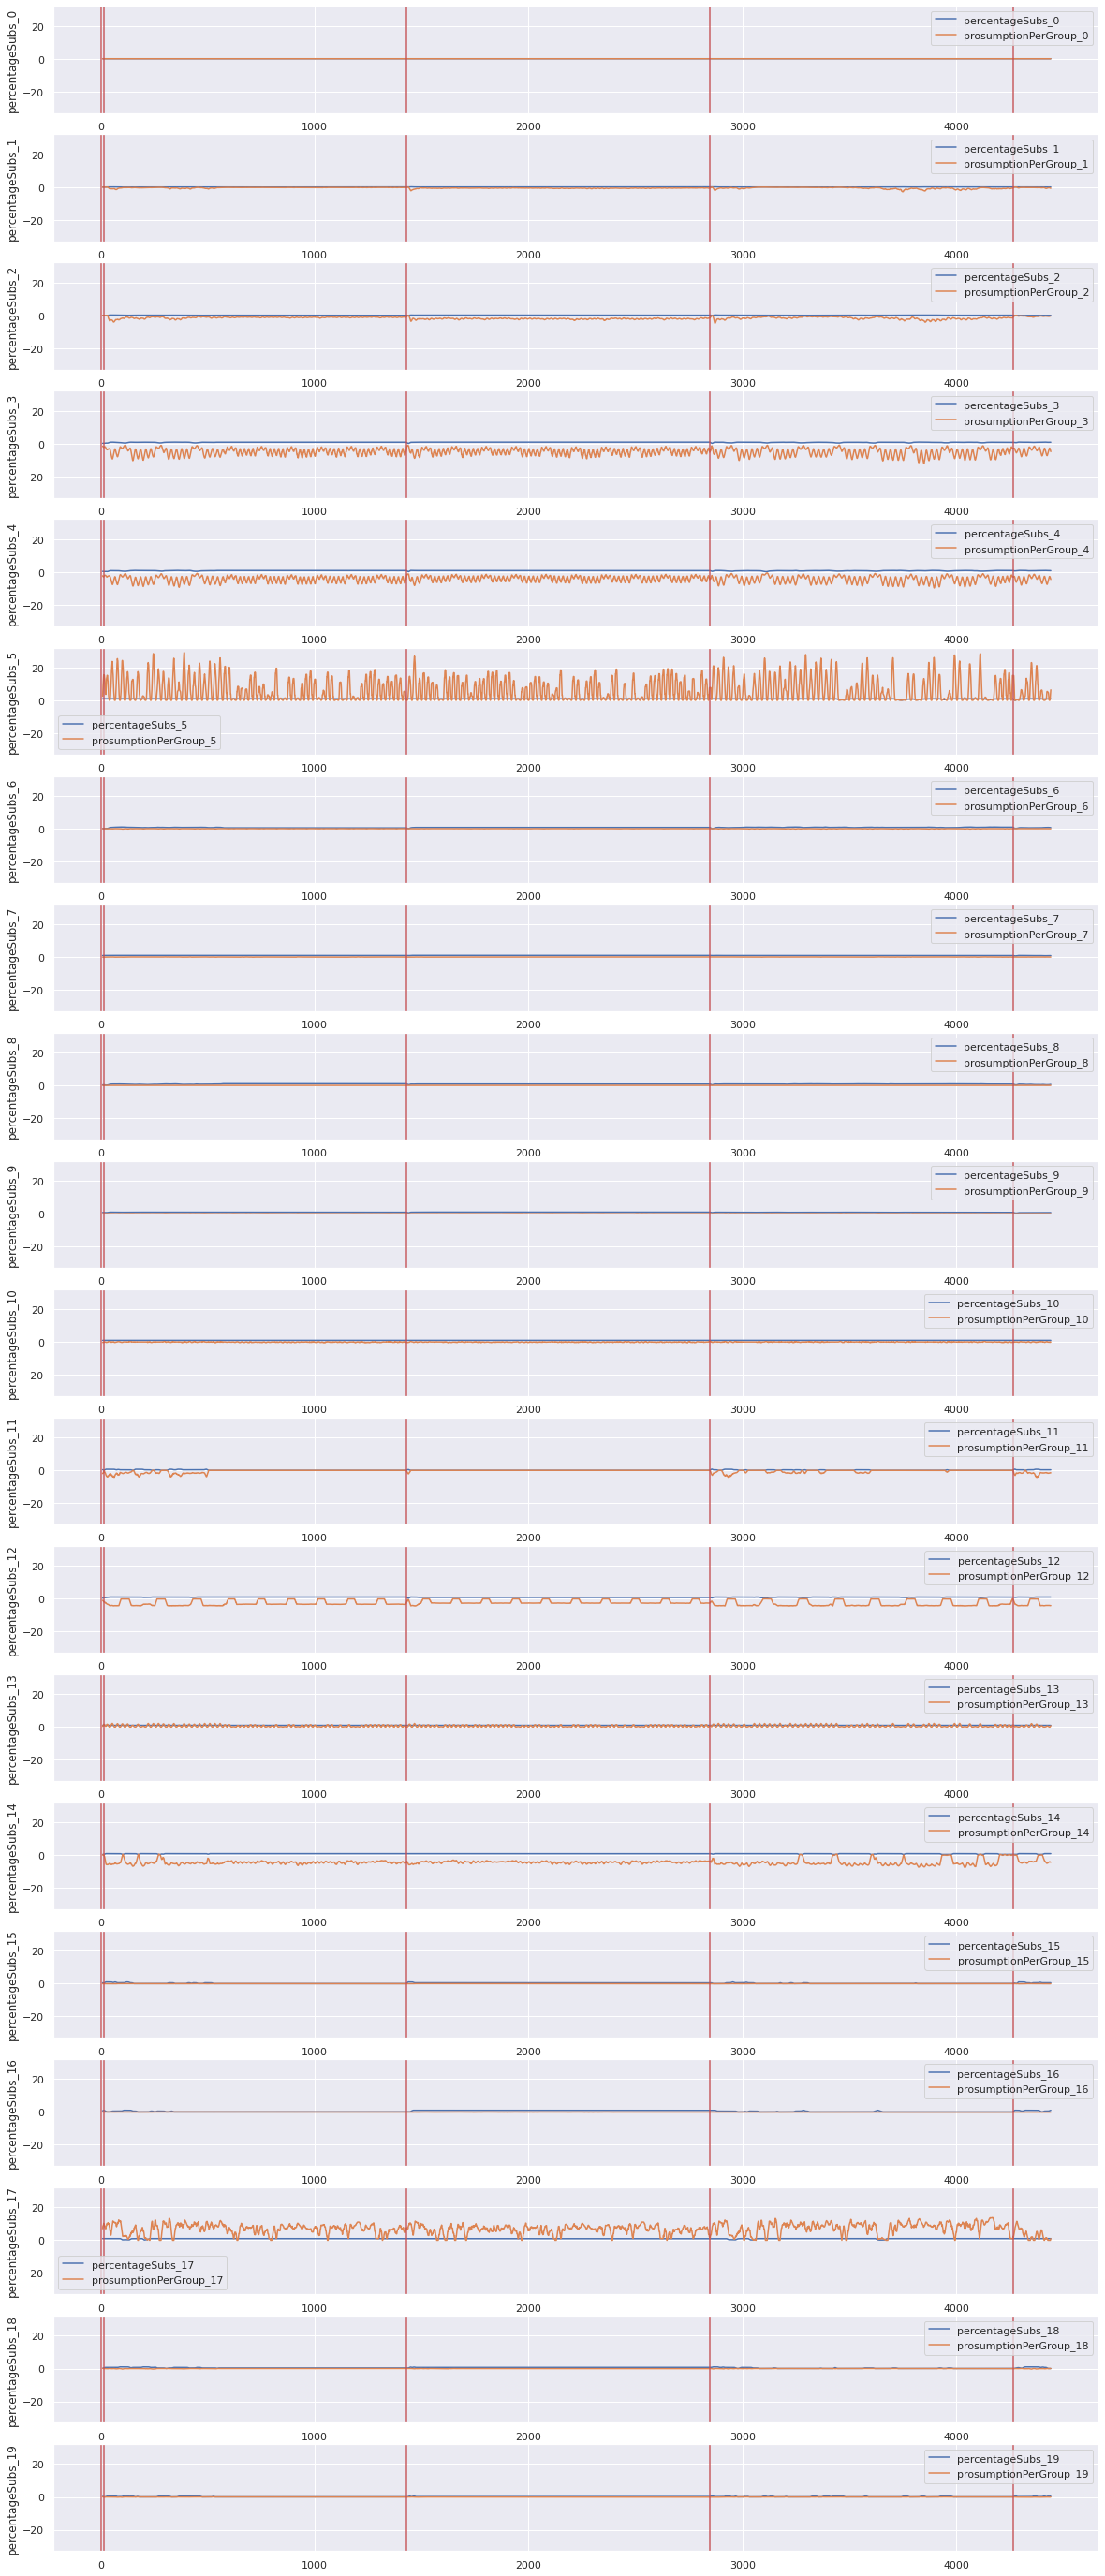

In [20]:
fig, axs = plt.subplots(20,1, sharey=True)
i=0
j=0
for col in df.columns:
    if "percentageSubs" in col:
        sns.lineplot(x=df[col].index ,y=(df[col].rolling(10).mean()), data=df[col] , ax=axs[i], label=col)
        #sns.lineplot(x=df.index, y=min_max_scaler(df["reward"]).rolling(5).mean(), data=df, ax=axs[i], label="reward")
        i+=1
        
       
        #axs[i].legend()
    if "prosumptionPerGroup" in col:
        sns.lineplot(x=df[col].index ,y=(df[col].rolling(10).mean()/1000), data=df[col] , ax=axs[j], label=col)
        j+=1
        
#axs[0].set_ybound(-30,5)
fig.set_figwidth(20)
fig.set_figheight(50)
for ax in axs:
    ax.vlines(
            df[df["gameId"].shift() != df["gameId"]].index,
            -30,5,
            transform=ax.get_xaxis_transform(),
            colors="r",
            alpha=0.9,
            label="New game",
        )

<AxesSubplot:>

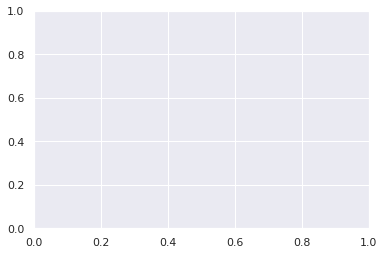

In [21]:
temp_df3 = abs(((abs(df["p_customer_prosumption_0"]/1000)) - df["market_position_0"])) * -1

temp_df3 =temp_df3.iloc[8300:]
sns.lineplot(x=temp_df3.index, y=temp_df3)
sns.lineplot(x=temp_df3.index, y= df["reward"].iloc[8300:])

In [22]:
abs((df["p_customer_prosumption_0"])).tail(50)/1000

4393     8.644817
4394     7.037662
4395     7.097947
4396     7.808853
4397     8.720325
4398     6.675545
4399     8.268076
4400    10.797605
4401    11.032546
4402     9.646260
4403     8.055824
4404     9.617927
4405    11.409174
4406     9.450490
4407     9.867838
4408     8.365899
4409    10.561951
4410    10.969795
4411    10.255041
4412    11.006087
4413     9.936825
4414    10.657520
4415     7.396343
4416     9.667596
4417    10.305146
4418     9.869036
4419     8.829523
4420     9.169003
4421     9.764236
4422     8.076970
4423    10.046634
4424    10.316962
4425     9.617373
4426     9.055374
4427     5.079548
4428     7.155003
4429     6.189995
4430     6.946560
4431     2.790055
4432     5.371381
4433     7.577810
4434     9.784085
4435     8.347289
4436     8.428888
4437     9.950068
4438    10.242367
4439     8.508394
4440     8.796748
4441     9.873926
4442    11.061057
Name: p_customer_prosumption_0, dtype: float64

In [23]:
temp_series = df[["prosumptionPerGroup_5","p_customer_prosumption_0", "market_position_0"]]/1000
temp_series["sum_mWh"] = df["sum_mWh"]
temp_series.tail(50)

,prosumptionPerGroup_5,p_customer_prosumption_0,market_position_0,sum_mWh
4393,10.67281,-8.644817,0.000000,-13.841926
4394,2.49375,-7.037662,0.000000,7.932101
4395,27.18209,-7.097947,0.000000,11.478621
4396,3.74264,-7.808853,0.001307,15.304462
4397,2.39643,-8.720325,-0.002044,21.090910
4398,1.17401,-6.675545,0.001334,15.861571
4399,1.00856,-8.268076,0.000335,15.668541
4400,0.61777,-10.797605,0.000000,18.126485
4401,0.10826,-11.032546,0.000266,15.337451
4402,0.00000,-9.646260,0.001233,18.103818


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

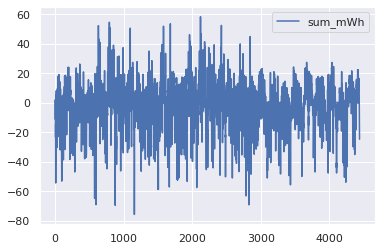

In [25]:
diff_i = 10
df_pred = ((df["sum_mWh"]) - ((df[f"p_customer_prosumption_{diff_i}"])/-1000))
sns.lineplot(x=range(len(df_pred)), y=df_pred, label="sum_mWh")
#sns.lineplot(x=df.index, y=, data=df, ax=axs[4], label="p_customer_prosumption_0") 
df_pred = df_pred.shift(-diff_i).dropna()
X = df[df.columns.difference(["gameId"])]
X = X[:len(X)-diff_i]
y = df["sum_mWh"].shift(-diff_i).dropna()
#y = df_pred
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, shuffle=False)

In [26]:
%%time




rf = RandomForestRegressor(warm_start=True, n_estimators=40, max_features="sqrt")
rf.fit(X_train, y_train)
#sarimax.

CPU times: user 684 ms, sys: 280 µs, total: 684 ms
Wall time: 683 ms


RandomForestRegressor(max_features='sqrt', n_estimators=40, warm_start=True)

In [27]:
%%time
rf.fit(X_val, y_val)

CPU times: user 1.09 ms, sys: 3.41 ms, total: 4.51 ms
Wall time: 4.01 ms


/home/lkriehn/venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:430: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  "Warm-start fitting without increasing n_estimators does not "


RandomForestRegressor(max_features='sqrt', n_estimators=40, warm_start=True)

In [28]:
rf.score(X_test, y_test)

0.2880238423479895

In [29]:
for index, name in df[df["reward"] < 0.1].corr()["reward"].sort_values().iteritems():
    print(f"{index}, {name}")

cleared_trade_energy_1, -0.14001617590283172
percentageSubs_9, -0.11550722530984664
market_position_23, -0.10157580972998775
energy_24, -0.09568696816372681
cleared_orders_energy_23, -0.09241324468141401
percentageSubs_5, -0.08991402288880274
market_position_0, -0.08646371111302222
p_grid_imbalance_2, -0.08499189501678554
percentageSubs_7, -0.08299316230228344
p_grid_imbalance_3, -0.08010725917440108
p_grid_imbalance_0, -0.07669016079888782
p_wind_speed_21, -0.0743429922069744
p_grid_imbalance_1, -0.07382493475910831
p_grid_imbalance_4, -0.07310498843421916
p_wind_speed_19, -0.07279297250996837
p_wind_speed_18, -0.07264269182761332
p_grid_imbalance_5, -0.07223597412233863
p_wind_speed_20, -0.07216863556570187
p_wind_speed_17, -0.07153707769826019
p_wind_speed_16, -0.07095268209532692
p_wind_speed_15, -0.06918362598186231
hour_of_day_4, -0.06877927720757519
prosumptionPerGroup_1, -0.06754705052580227
market_position_22, -0.06733152282815259
percentageSubs_8, -0.06529110628794288
p_wind_

In [30]:
df["gameId"]

0       game0
1       game0
2       game0
3       game0
4       game0
        ...  
4438    game4
4439    game4
4440    game4
4441    game4
4442    game4
Name: gameId, Length: 4443, dtype: object

In [31]:
# Or just use shift?
index_slot = 201
col_names_temp = ["reward", "customer_count"]
templist = []
for i in range(24):
    energy_price_bid = df.iloc[(index_slot - i)][[f"energy_{i+1}",f"price_{i+1}"]].values
    trade_result = df.iloc[index_slot - i-1][[f"cleared_orders_energy_{i}", f"cleared_orders_price_{i}"]].values
    market_position = df.iloc[index_slot -i][f"market_position_{i}"]
    sum_mwh = df.iloc[index_slot]["sum_mWh"]
    index_slot_list = df.iloc[index_slot-i].name
    predicted_prosumption=df.iloc[index_slot-i][f"p_customer_prosumption_{i}"]/1000
    #if i = 0:
    #    trade_result[0] = df.iloc[timeslot]["final"]
    templist.append([*energy_price_bid, *trade_result, market_position, sum_mwh, index_slot_list, predicted_prosumption])

df_action_analysis = pd.DataFrame(templist, columns=["energy_action", "price_action", "energy_orders_energy", "price_orders_energy", "market_position", "sum_mWh", "index_slot", "predicted_prosumption"])
df_action_analysis

,energy_action,price_action,energy_orders_energy,price_orders_energy,market_position,sum_mWh,index_slot,predicted_prosumption
0,-0.320295,-1.029643,0.000000,0.000000,-42.854223,17.883146,201,-14.052059
1,-3.867784,-1.600470,0.000000,0.000000,-42.854223,17.883146,200,-9.688359
2,-4.393881,-1.805094,0.000000,0.000000,-37.727483,17.883146,199,-8.704692
3,0.430660,-0.935105,0.000000,0.000000,-31.069561,17.883146,198,-9.883359
4,-2.120339,-1.335879,0.000000,0.000000,-31.069561,17.883146,197,-9.559910
5,2.587982,-0.625314,0.000000,0.000000,-28.187299,17.883146,196,-10.154173
6,1.609835,-0.736728,0.000000,0.000000,-26.285845,17.883146,195,-9.361822
7,-1.403647,-1.219812,0.000000,0.000000,-24.482610,17.883146,194,-9.632761
8,6.015615,-0.012236,0.000000,0.000000,-20.058061,17.883146,193,-9.337228
9,-2.476265,-1.372627,0.000000,0.000000,-20.058061,17.883146,192,-9.892521


In [32]:
df_action_analysis.style.background_gradient(cmap="bwr")

,energy_action,price_action,energy_orders_energy,price_orders_energy,market_position,sum_mWh,index_slot,predicted_prosumption
0,-0.320295,-1.029643,0.000000,0.000000,-42.854223,17.883146,201,-14.052059
1,-3.867784,-1.600470,0.000000,0.000000,-42.854223,17.883146,200,-9.688359
2,-4.393881,-1.805094,0.000000,0.000000,-37.727483,17.883146,199,-8.704692
3,0.430660,-0.935105,0.000000,0.000000,-31.069561,17.883146,198,-9.883359
4,-2.120339,-1.335879,0.000000,0.000000,-31.069561,17.883146,197,-9.559910
5,2.587982,-0.625314,0.000000,0.000000,-28.187299,17.883146,196,-10.154173
6,1.609835,-0.736728,0.000000,0.000000,-26.285845,17.883146,195,-9.361822
7,-1.403647,-1.219812,0.000000,0.000000,-24.482610,17.883146,194,-9.632761
8,6.015615,-0.012236,0.000000,0.000000,-20.058061,17.883146,193,-9.337228
9,-2.476265,-1.372627,0.000000,0.000000,-20.058061,17.883146,192,-9.892521


In [33]:
i = 0
index_slot = 201
df.iloc[index_slot][[*[f"cleared_orders_energy_{i}", f"cleared_orders_price_{i}"], f"market_position_{i}", "sum_mWh", f"p_customer_prosumption_{i}"]]
#[*[f"sum_mWh", "price_1"], *["price_2", "test3"]]
#[*["test", "test2"],*["test3", "test4"]]
df["cleared_orders_energy_4"]

0       0.000000
1       0.000000
2      -2.787346
3       0.000000
4       0.000000
          ...   
4438    0.000000
4439    0.000000
4440    0.000000
4441    0.000000
4442    0.000000
Name: cleared_orders_energy_4, Length: 4443, dtype: float64

In [34]:
df[["price_24","energy_24"]].iloc[177]

price_24    -10.306215
energy_24     1.104900
Name: 177, dtype: float64

In [35]:
a = df.iloc[df.index <201][[x for x in df.columns if (x.startswith("energy_") | (x.startswith("price_")))]]
a.iloc[a.index > 170].T

,171,172,173,174,175,176,177,178,179,180,...,191,192,193,194,195,196,197,198,199,200
energy_1,-50.413219,-1.950822,-0.203349,5.658748,1.568698,-9.805756,-10.326122,-11.685839,2.176300,9.977675,...,-18.616103,-9.401677,2.339650,-0.654757,1.205513,1.402098,-0.765181,-1.721028,0.067226,20.297731
price_1,-0.055560,-1.307263,-1.799268,-0.031425,-0.850266,-0.680085,-1.830292,-0.320012,-0.783824,-1.251439,...,-0.006057,-1.762564,-1.719189,-0.072764,-0.828616,-0.022625,-1.277797,-0.840719,-0.994617,-1.666059
energy_2,-1.079290,-0.216498,-2.621038,5.308870,-9.889747,2.799970,-18.133279,8.096643,11.661791,6.810031,...,8.165350,-0.058939,-0.545725,-3.428262,0.552832,-0.528395,7.076006,-5.126740,19.187003,-3.867784
price_2,-1.239480,-1.503345,-1.748755,-0.451770,-0.718539,-0.675445,-0.111512,-0.099924,-1.260872,-0.437306,...,-0.388742,-0.978973,-1.243381,-1.529610,-0.669993,-1.287037,-1.554659,-1.455608,-1.684806,-1.600470
energy_3,-0.984953,1.164243,2.940191,-29.065236,-2.194976,2.024861,-2.011168,23.728973,-5.163993,-14.526047,...,-1.130567,0.002878,5.789510,-0.140900,0.567250,1.300932,-6.657922,10.839181,-4.393881,-9.321398
price_3,-0.321696,-0.542228,-0.664532,-0.181551,-1.313174,-1.104863,-1.295265,-1.531328,-1.729486,-0.138050,...,-0.675840,-0.997293,-0.255155,-1.343620,-1.338597,-1.094550,-1.646124,-1.520478,-1.805094,-0.359734
energy_4,0.000631,6.073526,34.207101,-5.459589,-3.385665,3.995890,24.565381,4.710411,1.096765,-0.273783,...,0.020502,-4.778518,-0.740848,1.116159,13.718744,7.379748,12.159508,0.430660,-1.397128,6.490264
price_4,-0.999629,-0.286172,-1.944982,-1.747343,-0.769572,-0.333927,-1.538054,-0.360455,-1.054737,-1.114335,...,-1.024974,-1.819587,-1.176477,-1.630089,-1.914230,-0.257835,-1.572954,-0.935105,-0.907404,-1.670393
energy_5,2.100195,7.325785,-4.977540,8.918889,3.957078,39.473399,-4.869642,-9.038400,0.133100,-0.927583,...,-0.404134,-0.518346,1.000394,1.429488,-2.882263,-3.342894,-2.120339,11.628167,-4.352147,-8.129538
price_5,-0.751227,-1.202838,-1.730031,-1.963612,-0.318198,-1.885872,-1.672624,-0.372810,-0.768080,-1.379320,...,-1.145355,-1.137435,-1.958823,-1.093599,-1.318978,-0.816182,-1.335879,-1.990354,-0.569086,-1.926136


In [36]:
energy_price_bid

array([5.403652197211981, -2.137244400270323], dtype=object)

In [37]:
for index, value in df[df.columns.difference(pd.Index(["gameId"]))].corr()["reward"].sort_values().iteritems():
    
    print(index, value)

cleared_trade_energy_1 -0.14001617590283172
percentageSubs_9 -0.11550722530984664
market_position_23 -0.10157580972998775
energy_24 -0.09568696816372681
cleared_orders_energy_23 -0.09241324468141401
percentageSubs_5 -0.08991402288880274
market_position_0 -0.08646371111302222
p_grid_imbalance_2 -0.08499189501678554
percentageSubs_7 -0.08299316230228344
p_grid_imbalance_3 -0.08010725917440108
p_grid_imbalance_0 -0.07669016079888782
p_wind_speed_21 -0.0743429922069744
p_grid_imbalance_1 -0.07382493475910831
p_grid_imbalance_4 -0.07310498843421916
p_wind_speed_19 -0.07279297250996837
p_wind_speed_18 -0.07264269182761332
p_grid_imbalance_5 -0.07223597412233863
p_wind_speed_20 -0.07216863556570187
p_wind_speed_17 -0.07153707769826019
p_wind_speed_16 -0.07095268209532692
p_wind_speed_15 -0.06918362598186231
hour_of_day_4 -0.06877927720757519
prosumptionPerGroup_1 -0.06754705052580227
market_position_22 -0.06733152282815259
percentageSubs_8 -0.06529110628794288
p_wind_speed_14 -0.0651599973498

In [38]:
df2 = pd.DataFrame()
df2["predicted_consumption_mWh"] = df["p_customer_prosumption_0"] /-1000
df2["timeslot"] = df["timeslot"]
df2["market_position_0"] = df["market_position_0"]
df2["sum_mWh"] = df["sum_mWh"]
df2["error_prediction"] = abs(df2["sum_mWh"]) - df2["predicted_consumption_mWh"]
df2

,predicted_consumption_mWh,timeslot,market_position_0,sum_mWh,error_prediction
0,4.338684,360,0.000000,-5.773340,1.434656
1,2.656263,363,0.000000,-0.133273,-2.522989
2,3.345203,364,-2.548109,7.570374,4.225171
3,2.949218,365,1.398401,0.992923,-1.956295
4,2.125500,366,1.814274,1.533296,-0.592203
...,...,...,...,...,...
4438,10.242367,535,0.000000,6.889371,-3.352996
4439,8.508394,536,0.000000,5.592931,-2.915462
4440,8.796748,537,0.000000,-6.419949,-2.376799
4441,9.873926,538,0.000000,-14.729479,4.855554


### Action analysis

In [39]:
#f,axs = plt.subplots(1,1,figsize=(25,25))
#for i in range(1):
    #ax = sns.scatterplot(x=action_observation_reward_df[f"price_{i+1}"], y=action_observation_reward_df[f"energy_{i+1}"], data=action_observation_reward_df, hue="balancing_reward", ax=axs)
#    ax = sns.histplot(x=df[f"price_{i+1}"], y=df[f"energy_{i+1}"], data=df, hue="balancing_reward", ax=axs)
    

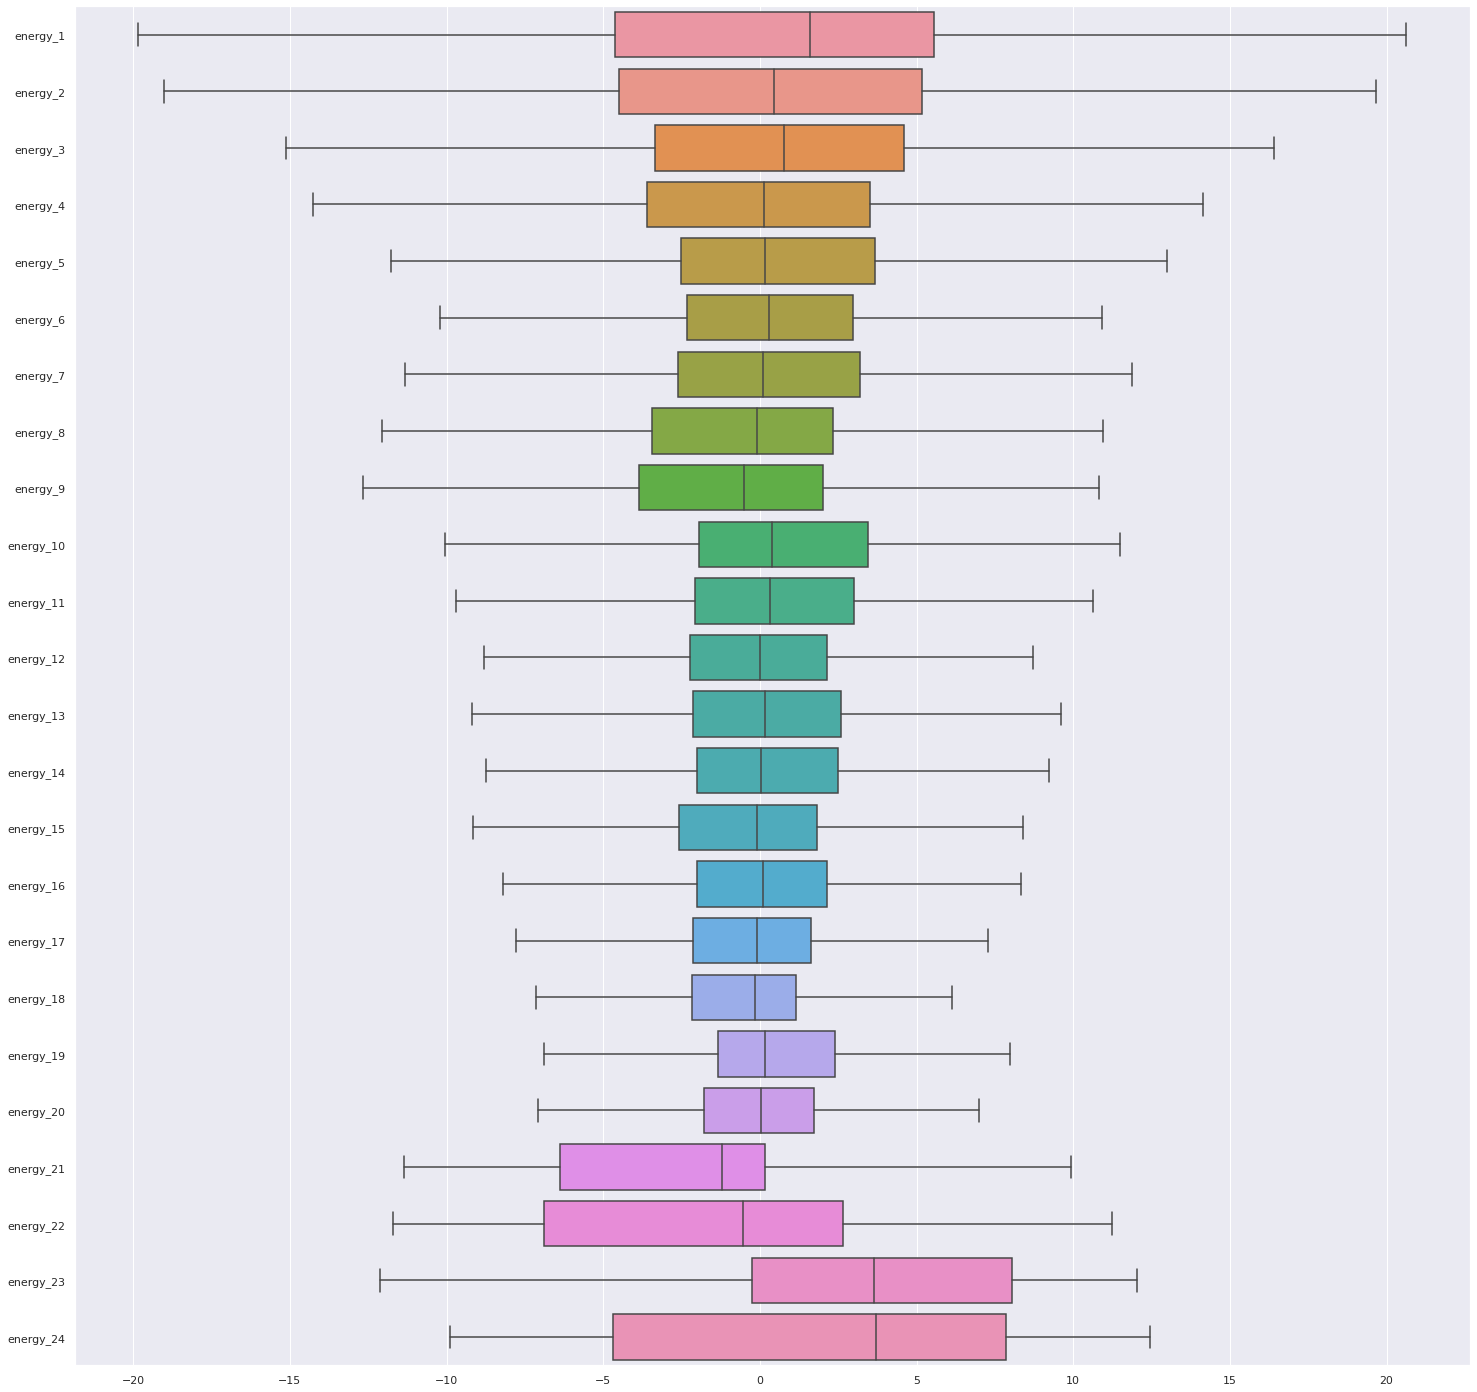

In [40]:
plot_args= {"cut": 0}
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df[energy], orient="h", showfliers = False)

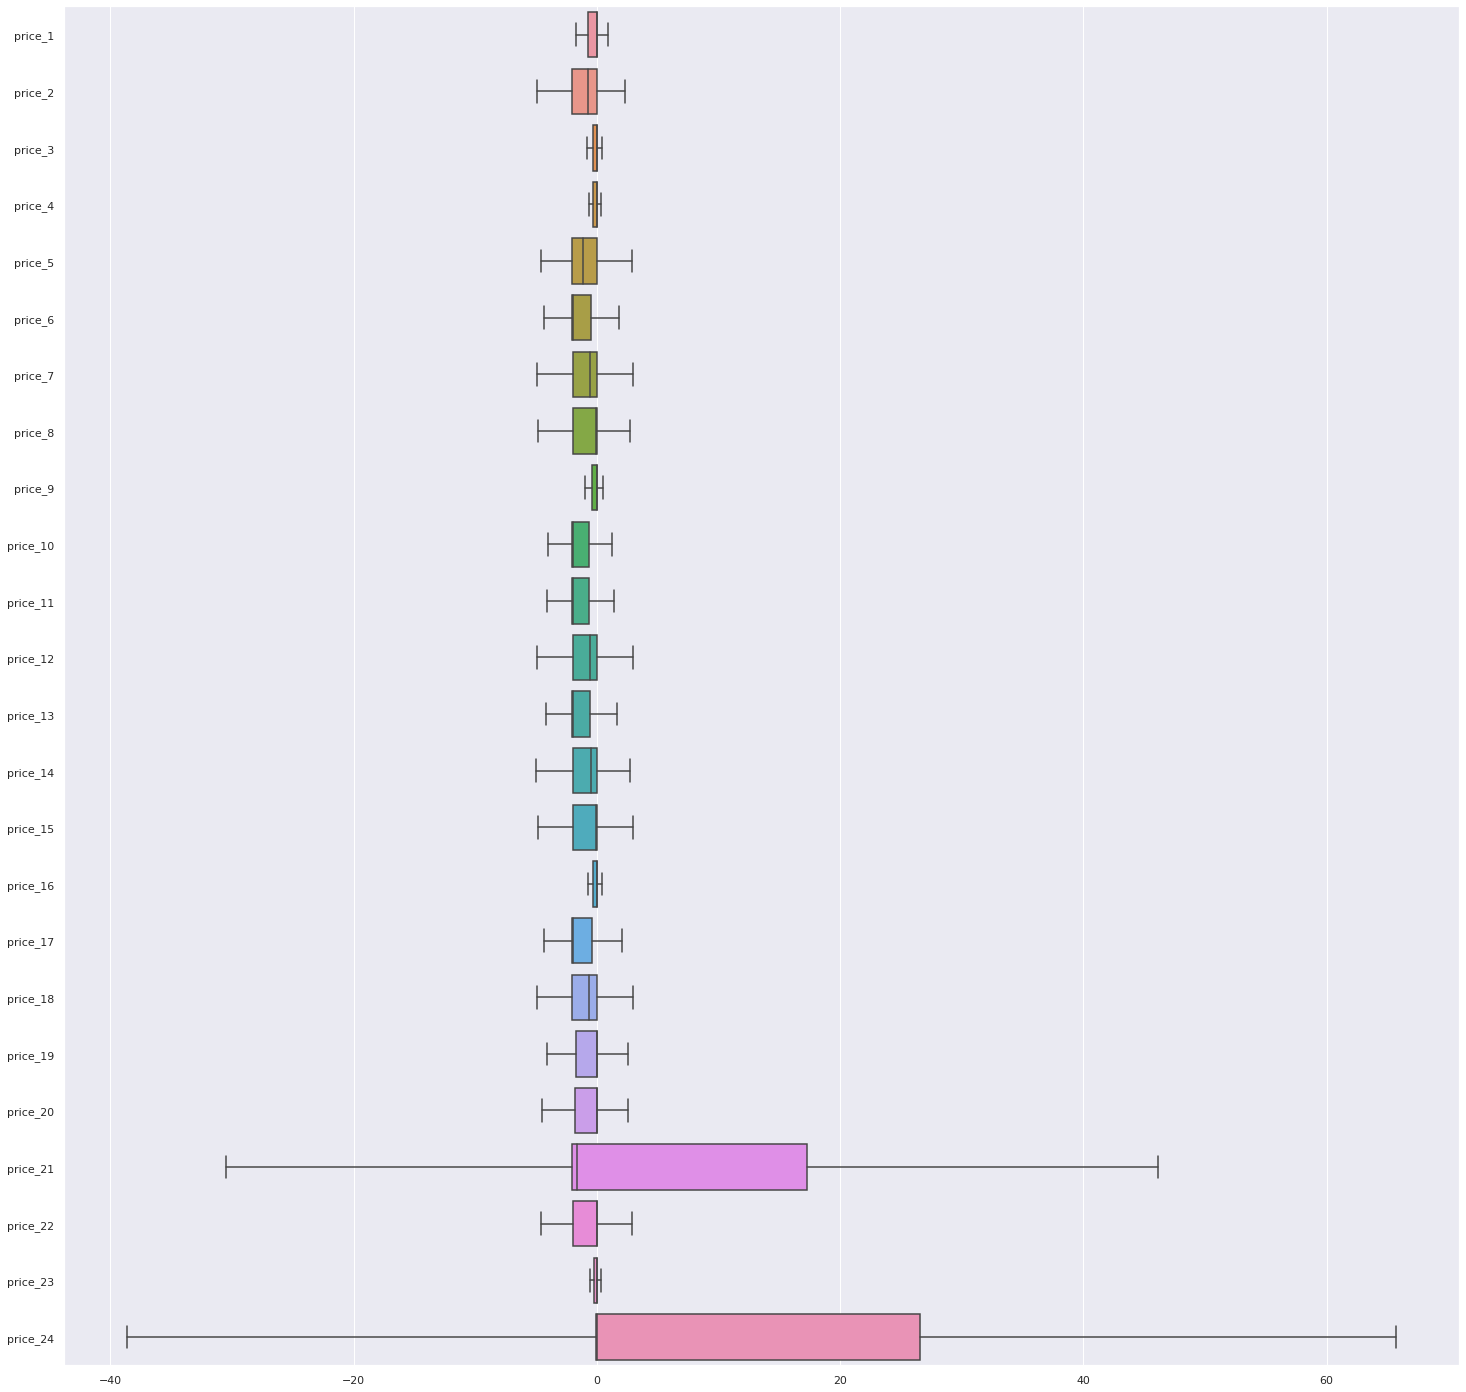

In [41]:
f,axs = plt.subplots(1,1,figsize=(25,25))
ax = sns.boxplot(data=df[price],  orient="h", showfliers = False)

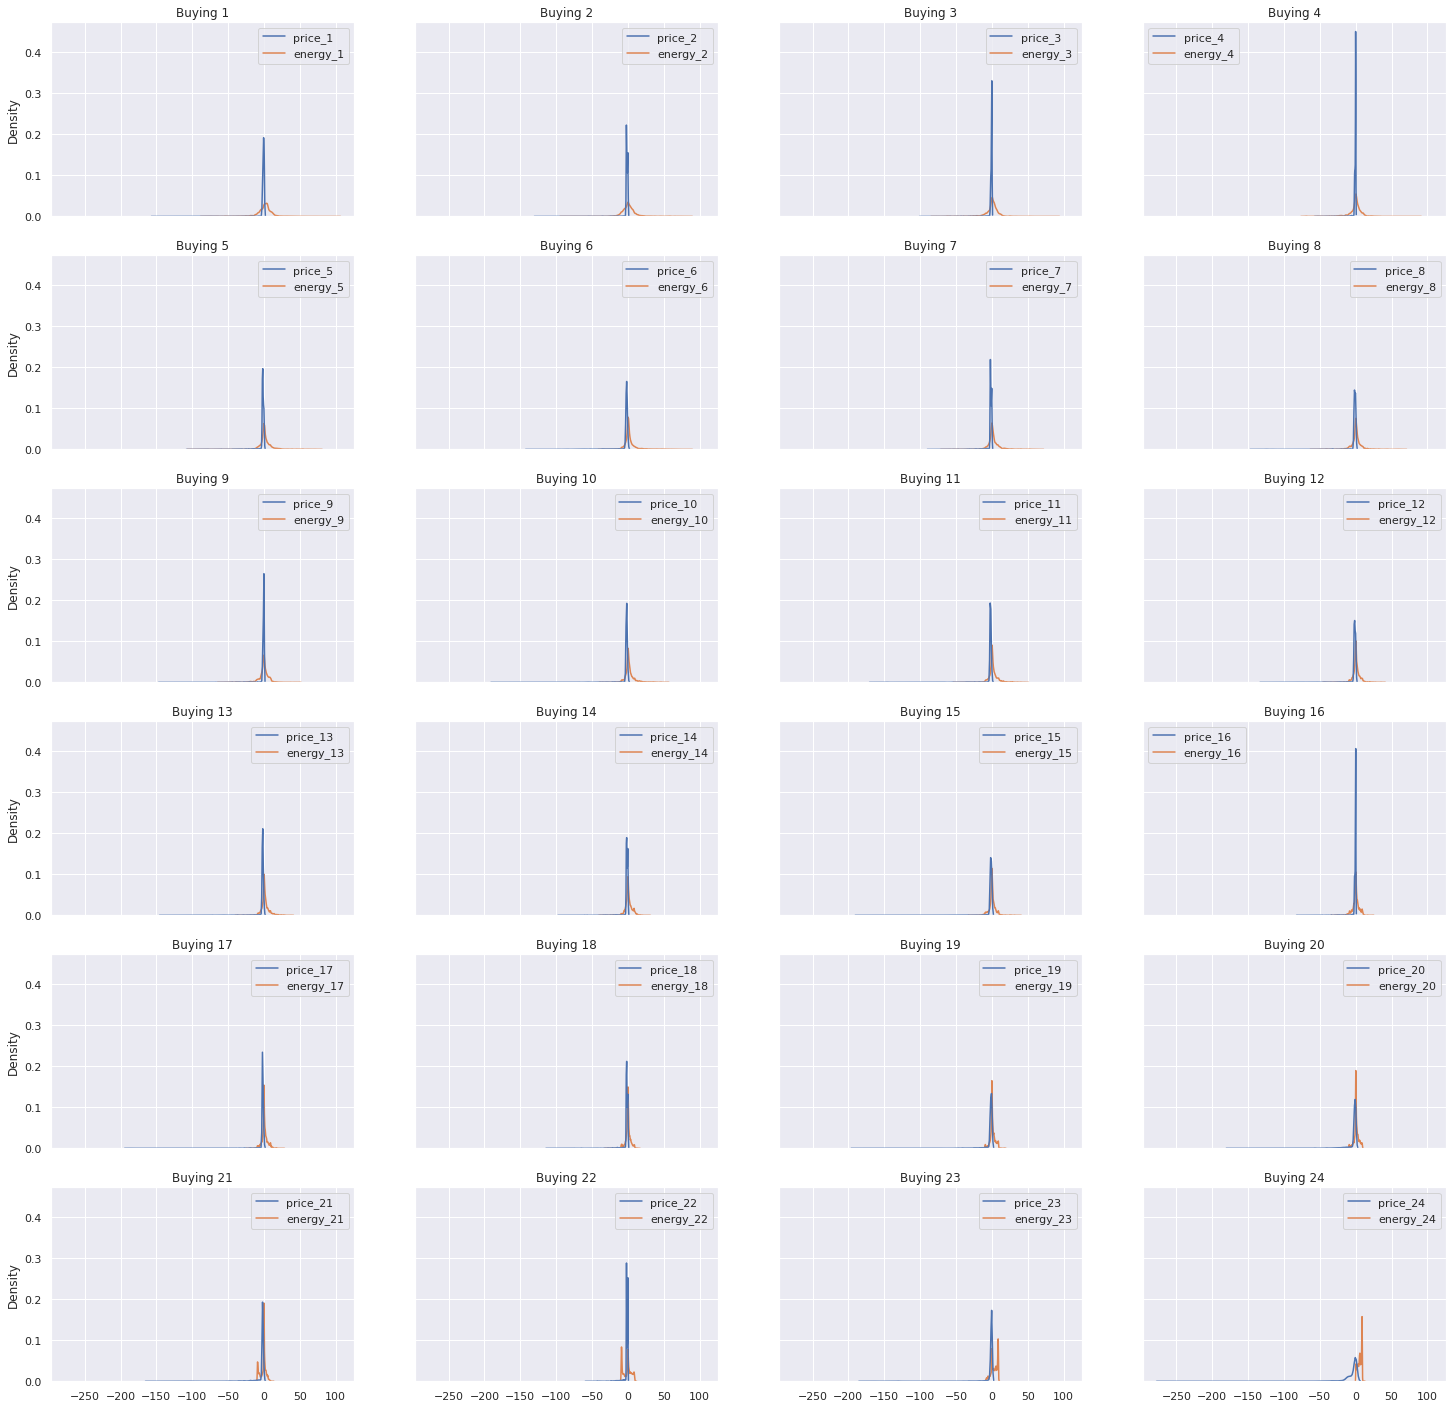

In [42]:
f,axs = plt.subplots(6,4,figsize=(25,25) ,sharex=True, sharey=True)

for i in range(0,24,1):
    df_seleciton = df.loc[df[f"price_{i+1}"]<0]

    j = int(i/4)
    j2 = round(i%4)
    axs[j][j2].set_title(f"Buying {i+1}")
    sns.kdeplot(data=df_seleciton[[f"price_{i+1}", f"energy_{i+1}"]], ax=axs[j][j2], bw_adjust=0.3)


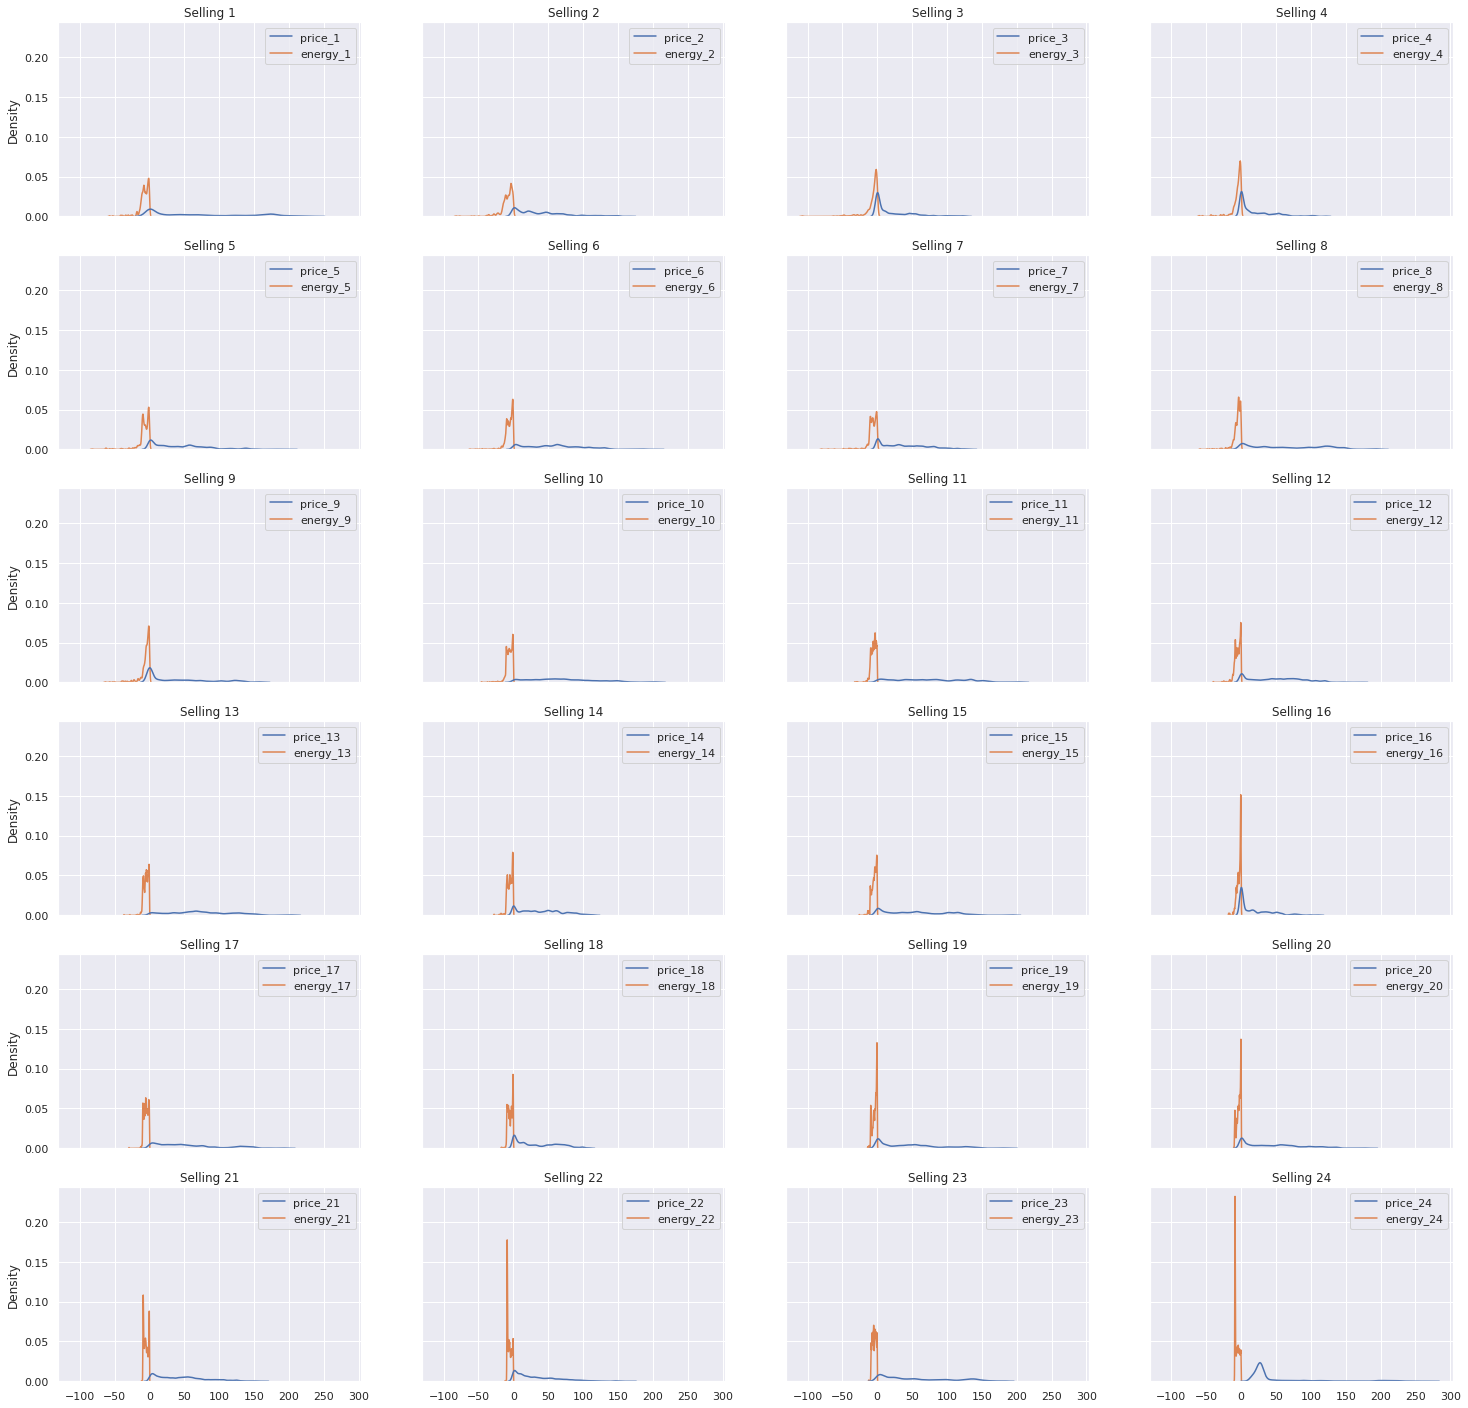

In [43]:
# Selling
from matplotlib.pyplot import title


f,axs = plt.subplots(6,4,figsize=(25,25) ,sharex=True, sharey=True)
for i in range(0,24,1):
    df_seleciton = df.loc[df[f"price_{i+1}"]>0]

    j = int(i/4)
    j2 = round(i%4)
    axs[j][j2].set_title(f"Selling {i+1}")
    sns.kdeplot(data=df_seleciton[[f"price_{i+1}", f"energy_{i+1}"]], ax=axs[j][j2], bw_adjust=0.3)